In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import matplotlib.dates as mdates

In [2]:
#read csv into dataframe
df = pd.read_csv("1. Weather Data.csv")
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
# What are the key characteristics of the dataset? (e.g., number of records, features, data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


We have data types that are float, integers and objects.
Total rows = 8784 starting from index 0 to 8783
8 columns in total

In [4]:
# Identify and handle any missing or null values. Describe your approach and reasoning.
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

No null values found in any column

In [5]:
# Check for and address any duplicate records.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Length: 8784, dtype: bool

No duplicates have been found as all results indicate "False"

In [6]:
df.drop_duplicates()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


The number of records remains the same after running the line to drop duplicate records.

In [7]:
# Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


The mean, standard deviation, percentiles, minimum and maximum values have been calculated for each column using the df.describe() command.

In [8]:
# show column names for ease of access
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [13]:
#create new dataframe with only numerical values (float and int types) thus dropping 2 columns
df2=df.loc[:, df.columns.drop(['Weather', 'Date/Time'])]
df2.head(20)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-1.8,-3.9,86,4,8.0,101.24
1,-1.8,-3.7,87,4,8.0,101.24
2,-1.8,-3.4,89,7,4.0,101.26
3,-1.5,-3.2,88,6,4.0,101.27
4,-1.5,-3.3,88,7,4.8,101.23
5,-1.4,-3.3,87,9,6.4,101.27
6,-1.5,-3.1,89,7,6.4,101.29
7,-1.4,-3.6,85,7,8.0,101.26
8,-1.4,-3.6,85,9,8.0,101.23
9,-1.3,-3.1,88,15,4.0,101.20


In [14]:
# Identify and describe any significant outliers in the data.
from sklearn.preprocessing import MinMaxScaler

data = df2
df2.head(20)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-1.8,-3.9,86,4,8.0,101.24
1,-1.8,-3.7,87,4,8.0,101.24
2,-1.8,-3.4,89,7,4.0,101.26
3,-1.5,-3.2,88,6,4.0,101.27
4,-1.5,-3.3,88,7,4.8,101.23
5,-1.4,-3.3,87,9,6.4,101.27
6,-1.5,-3.1,89,7,6.4,101.29
7,-1.4,-3.6,85,7,8.0,101.26
8,-1.4,-3.6,85,9,8.0,101.23
9,-1.3,-3.1,88,15,4.0,101.20


start out by normalizing the data to range from 0 to 1 this makes the scale uniform and ensures the outliers are much easier to visualize

In [15]:
#normalize the data using the minmax scaler
scaler = MinMaxScaler()
scaled_data2 = scaler.fit_transform(df2)

#rename columns for the new array
column_names = ["Temp_C", "Dew Point Temp_C", "Rel Hum_%", "Wind Speed_km/h", "Visibility_km", "Press_kPa"]

#convert array into dataframe using pandas library
res = pd.DataFrame(scaled_data2, columns=column_names)
pd.set_option("max_columns", 6)
print("Result:\n", res)

Result:
         Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0     0.381883          0.465028   0.829268         0.048193       0.162162   
1     0.381883          0.468809   0.841463         0.048193       0.162162   
2     0.381883          0.474480   0.865854         0.084337       0.079002   
3     0.387211          0.478261   0.853659         0.072289       0.079002   
4     0.387211          0.476371   0.853659         0.084337       0.095634   
...        ...               ...        ...              ...            ...   
8779  0.415631          0.487713   0.768293         0.361446       0.197505   
8780  0.417407          0.493384   0.792683         0.289157       0.197505   
8781  0.404973          0.510397   0.914634         0.337349       0.095634   
8782  0.410302          0.504726   0.865854         0.337349       0.197505   
8783  0.413854          0.499055   0.829268         0.361446       0.230769   

      Press_kPa  
0      0.606852  
1     

<function matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, capwidths=None, *, data=None)>

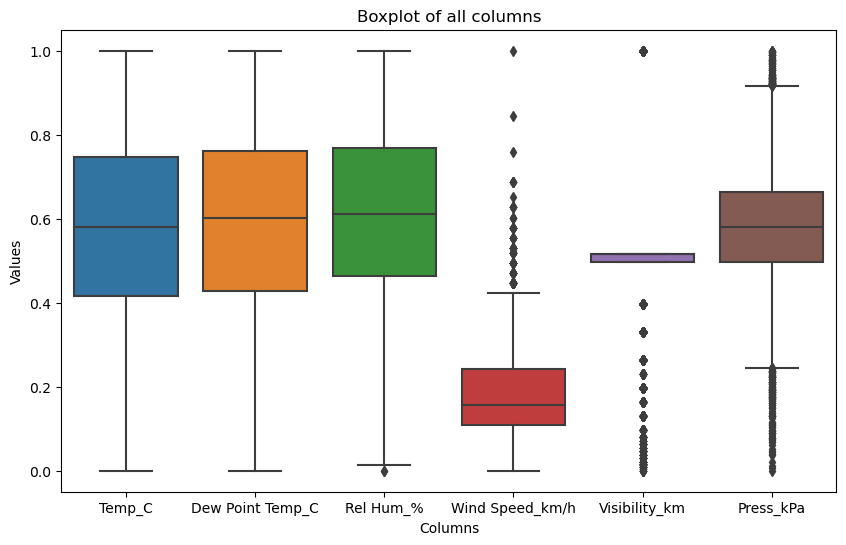

In [16]:
#plot boxplot to show outliers
plt.figure(figsize=(10,6))
sns.boxplot(res)
plt.title("Boxplot of all columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.boxplot

Significant outliers are visible when plotting a boxplot and this is shown 
to be found in the columns containing values in km or km/h (Wind speed and visibility) as the minimum and maximum values
are much higher or lower than the rest

In [62]:
# Create correlation matrices and heatmaps to identify relationships between different weather parameters.
correlation_matrix = df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].corr()
correlation_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


The correlation between items measured in degrees celsius is positive. 
The correlation between visibility and all other elements (temperature, pressure and dew point) is negative. 
The correlation between temperature and visibility and visibility and pressure is seen to be leaning more to a neutral side. 
This is visualized below

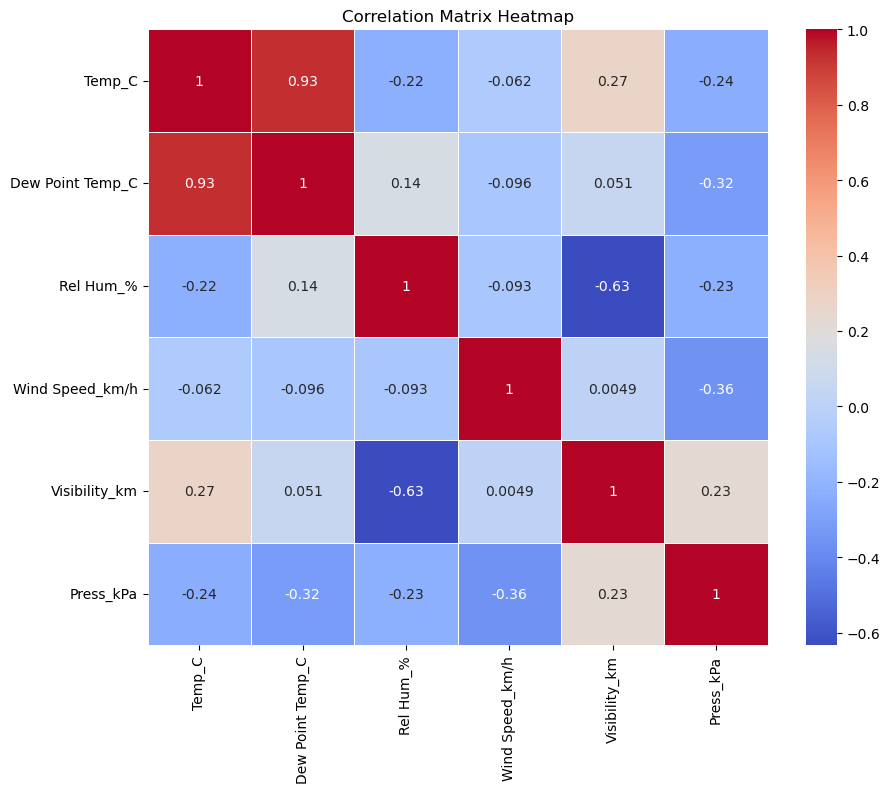

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

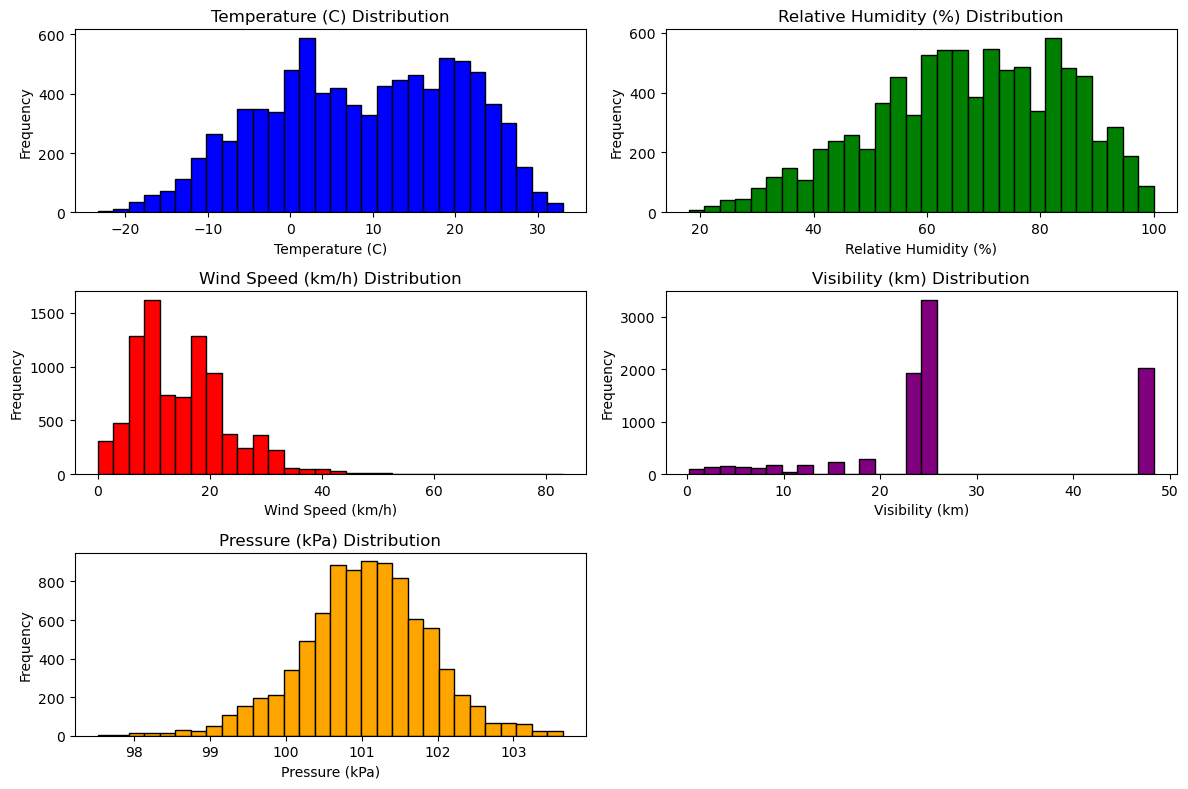

In [45]:
# Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).
plt.figure(figsize=(12, 8))

# Temperature distribution
plt.subplot(3, 2, 1)
plt.hist(df['Temp_C'], bins=30, color='blue', edgecolor='black')
plt.title('Temperature (C) Distribution')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')

# Humidity distribution
plt.subplot(3, 2, 2)
plt.hist(df['Rel Hum_%'], bins=30, color='green', edgecolor='black')
plt.title('Relative Humidity (%) Distribution')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')

# Wind Speed distribution
plt.subplot(3, 2, 3)
plt.hist(df['Wind Speed_km/h'], bins=30, color='red', edgecolor='black')
plt.title('Wind Speed (km/h) Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')

# Visibility distribution
plt.subplot(3, 2, 4)
plt.hist(df['Visibility_km'], bins=30, color='purple', edgecolor='black')
plt.title('Visibility (km) Distribution')
plt.xlabel('Visibility (km)')
plt.ylabel('Frequency')

# Pressure distribution
plt.subplot(3, 2, 5)
plt.hist(df['Press_kPa'], bins=30, color='orange', edgecolor='black')
plt.title('Pressure (kPa) Distribution')
plt.xlabel('Pressure (kPa)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [39]:
df.tail(20)
#verifying the range of dates for the entire dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy
8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy
8766,12/31/2012 6:00,-9.7,-11.7,85,4,25.0,101.23,Cloudy
8767,12/31/2012 7:00,-9.3,-11.3,85,0,19.3,101.19,Snow Showers
8768,12/31/2012 8:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,12/31/2012 9:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,12/31/2012 10:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8771,12/31/2012 11:00,-6.7,-7.9,91,9,9.7,100.93,Snow
8772,12/31/2012 12:00,-5.8,-7.5,88,4,12.9,100.78,Snow
8773,12/31/2012 13:00,-4.6,-6.6,86,4,12.9,100.63,Snow


In [ ]:
# Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.
plt.figure(figsize=(14, 10))

# Temperature over time
plt.subplot(5, 1, 1)
plt.plot(df['Date/Time'], df['Temp_C'], color='blue')
plt.grid(True)
plt.title('Temperature Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (C)')

# Humidity over time
plt.subplot(5, 1, 2)
plt.plot(df['Date/Time'], df['Rel Hum_%'], color='green')
plt.grid(True)
plt.title('Relative Humidity Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Relative Humidity (%)')

# Wind Speed over time
plt.subplot(5, 1, 3)
plt.plot(df['Date/Time'], df['Wind Speed_km/h'], color='red')
plt.grid(True)
plt.title('Wind Speed Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Wind Speed (km/h)')

#Pressure over time
plt.subplot(5, 1, 4)
plt.plot(df['Date/Time'], df['Press_kPa'], color='purple')
plt.grid(True)
plt.title('Fig 4: Pressure Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Pressure kPa')

plt.subplot(5, 1, 5)
plt.plot(df['Date/Time'], df['Visibility_km'], color='brown')
plt.grid(True)
plt.title('Fig 5: Visibility Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Visibility Km')


plt.tight_layout()
plt.show()

Temperature increases significantly over the months between May and September 
Wind speed remains relatively the same all year with spikes occuring once in a while 
Relative Humidity is much higher in the early months of the year and the later months and goes lower when the temperatures are high

Relative humidity does not vary sharply over the seasons as much a temperature does. We can see a sharp increase in temperature values over the months between May and September. The relationship between temperature and relative humidity is inverted- higher temps means lower humidity.

Pressure is relatively the same almost all year and tends to stagnate in the 